In [1]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI , GoogleGenerativeAIEmbeddings

load_dotenv()

True

In [2]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

In [3]:
print(llm.invoke("Hey , who are you ??"))
print(embeddings.embed_query("Hey , who are you ??"))

content="I am a large language model, trained by Google. I'm here to help answer your questions and provide information!" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'} id='lc_run--8044d423-b014-48f1-826c-b366bd649ce8-0' usage_metadata={'input_tokens': 7, 'output_tokens': 265, 'total_tokens': 272, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 241}}
[-0.007657204754650593, -0.03650370240211487, -0.047206588089466095, -0.020650196820497513, 0.020582176744937897, 0.02473335713148117, 0.03401658311486244, 0.024470049887895584, -0.013394668698310852, 0.03104269877076149, -0.021255671977996826, 0.022455960512161255, 0.10696950554847717, -0.02052895538508892, -0.018678538501262665, -0.03552921861410141, 0.01856077089905739, 0.041322413831949234, -0.09512614458799362,

In [4]:
from typing_extensions import TypedDict
#We are using typeddict so that we can represent our class in terms of dictionary ( key , value pairs)
class State(TypedDict):
    graph_info:str

In [5]:
def start_play(state:State):
    print("start_play node has been called")
    return {"graph_info":state["graph_info"]+"I am planning to play "}


def cricket(state:State):
    print("My cricket node has been called")
    return {"graph_info":state["graph_info"]+"cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state["graph_info"]+"badminton"}

In [10]:
import random
from typing import Literal

def random_play(state:State) -> Literal['cricket','badminton']:
    graph_info = state['graph_info']
    
    if random.random()>0.5:
        return "cricket"
    
    return "badminton"
    

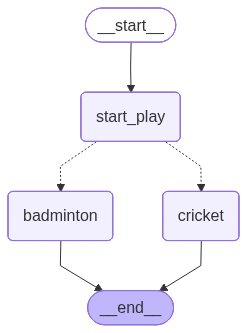

In [11]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke({"graph_info":"Hey my name is Aamir "})

start_play node has been called
My cricket node has been called


{'graph_info': 'Hey my name is Aamir I am planning to play cricket'}

Implementing simple chatbot using LLM

In [14]:
from typing_extensions import TypedDict,Annotated
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [16]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

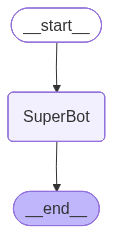

In [18]:
graph =StateGraph(State)

graph.add_node("SuperBot",superbot)
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
graph_builder.invoke({"messages":"Hi My name is Aamir and I am a software engineer at google"})

{'messages': [HumanMessage(content='Hi My name is Aamir and I am a software engineer at google', additional_kwargs={}, response_metadata={}, id='bdf3c93d-9388-4dfa-a500-20e122a2448f'),
  AIMessage(content="Hi Aamir,\n\nIt's great to meet you! A Software Engineer at Google – that's quite impressive.\n\nHow can I assist you today? What brings you here?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--6e7641fb-0241-4cf0-a705-d58f37934fa2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 652, 'total_tokens': 667, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 614}})]}

In [20]:
#Streamong the responses
graph_builder.stream({"messages":"Hello My name is Aamir"})

<generator object Pregel.stream at 0x0000013444F750D0>

In [24]:
#Streamong the responses
for event in graph_builder.stream({"messages":"Hello My name is Aamir"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello Aamir! Nice to meet you. How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--f5f48c45-a782-40d6-9639-ba83ad142186-0', usage_metadata={'input_tokens': 7, 'output_tokens': 209, 'total_tokens': 216, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 193}})]}}


In [22]:
#Streamong the responses
for event in graph_builder.stream({"messages":"Hello My name is Aamir"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is Aamir', additional_kwargs={}, response_metadata={}, id='68e8e40e-b848-43c9-9ba1-3897636474f7')]}
{'messages': [HumanMessage(content='Hello My name is Aamir', additional_kwargs={}, response_metadata={}, id='68e8e40e-b848-43c9-9ba1-3897636474f7'), AIMessage(content="Hello Aamir, nice to meet you!\n\nI'm an AI assistant. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--6a6b6168-8d37-4c9a-9a19-40adf0bfaf36-0', usage_metadata={'input_tokens': 7, 'output_tokens': 331, 'total_tokens': 338, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 307}})]}


In [23]:
#Streamong the responses
for event in graph_builder.stream({"messages":"Hello My name is Aamir"},stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Aamir! Nice to meet you. I'm an AI assistant. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--b5d0e21b-4795-4c79-b5af-a33cfa0077bc-0', usage_metadata={'input_tokens': 7, 'output_tokens': 395, 'total_tokens': 402, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 372}})]}}
